### Import Pustaka

In [47]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

import folium

from wordcloud import WordCloud, STOPWORDS

mpl.style.use('ggplot')

%matplotlib inline

 ### Load Data

In [48]:
df = pd.read_csv('london_crime_by_lsoa.csv')

In [49]:
# Melihat 5  Data teratas
df.head()

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6


In [50]:
# Melihat 5 data terbawah
df.tail()

,lsoa_code,borough,major_category,minor_category,value,year,month
13490599,E01000504,Brent,Criminal Damage,Criminal Damage To Dwelling,0,2015,2
13490600,E01002504,Hillingdon,Robbery,Personal Property,1,2015,6
13490601,E01004165,Sutton,Burglary,Burglary in a Dwelling,0,2011,2
13490602,E01001134,Croydon,Robbery,Business Property,0,2011,5
13490603,E01003413,Merton,Violence Against the Person,Wounding/GBH,0,2015,6


In [51]:
# Mengecek missing values
df.isnull().sum()

lsoa_code         0
borough           0
major_category    0
minor_category    0
value             0
year              0
month             0
dtype: int64

In [52]:
# Menampilkan info dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13490604 entries, 0 to 13490603
Data columns (total 7 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   lsoa_code       object
 1   borough         object
 2   major_category  object
 3   minor_category  object
 4   value           int64 
 5   year            int64 
 6   month           int64 
dtypes: int64(3), object(4)
memory usage: 720.5+ MB


In [53]:
# Menampilkan banyaknya kolom dan baris pada dataset
df.shape

(13490604, 7)

In [54]:
# Membuang kolom lsoa_code karena tidak dibutuhkan
# mengecek nama nama kolom
df.drop('lsoa_code', axis=1, inplace=True)


In [55]:
df = df[df.value != 0]
df.head()

,borough,major_category,minor_category,value,year,month
9,Sutton,Theft and Handling,Theft/Taking of Pedal Cycle,1,2016,8
16,Barking and Dagenham,Theft and Handling,Other Theft Person,1,2009,5
24,Ealing,Theft and Handling,Other Theft Person,2,2012,1
25,Hackney,Violence Against the Person,Harassment,1,2013,2
32,Bromley,Criminal Damage,Criminal Damage To Motor Vehicle,1,2016,4


In [56]:
df.borough

9                         Sutton
16          Barking and Dagenham
24                        Ealing
25                       Hackney
32                       Bromley
                    ...         
13490581                 Bromley
13490584                Lewisham
13490590               Greenwich
13490592                Lewisham
13490600              Hillingdon
Name: borough, Length: 3419099, dtype: object

Membuat kolom dengan judul kolom adalah jenis - jenis kejahatan di major_category

In [57]:
major_crime = pd.pivot_table(df, values=['value'], index=['borough'],
                             columns=['major_category'],
                             aggfunc=np.sum, fill_value=0)

major_crime

value                                          \
major_category         Burglary Criminal Damage  Drugs Fraud or Forgery   
borough                                                                   
Barking and Dagenham      18103           18888   9188              205   
Barnet                    36981           21024   9796              175   
Bexley                    14973           17244   7346              106   
Brent                     28923           20569  25978              157   
Bromley                   27135           24039   8942              196   
Camden                    27939           18482  21816              123   
City of London               15              16     33                0   
Croydon                   33376           31218  19162              270   
Ealing                    30831           25613  18591              175   
Enfield                   30213           22487  13251              132   
Greenwich                 20966           22755  10836              107   
Hackney                   21450           17327  18144              143   
Hammersmith and Fulham    17010           14595  15492               91   
Haringey                  28213           22272  14563              207   
Harrow                    19630           12724   7122               92   
Havering                  21302           17252   8171              179   
Hillingdon                26056           24485  11413              223   
Hounslow                  21026           21407  13722              183   
Islington                 22207           18354  16553               85   
Kensington and Chelsea    14980            9839  14573               85   
Kingston upon Thames      10131           10610   5682               65   
Lambeth                   30199           26136  25083              137   
Lewisham                  24871           24810  16825              262   
Merton                    16485           14339   6651              111   
Newham                    25356           24177  18389              323   
Redbridge                 26735           17543  15736              284   
Richmond upon Thames      16097           11722   4707               37   
Southwark                 27980           24450  27381              321   
Sutton                    13207           14474   4586               57   
Tower Hamlets             21510           21593  23408              124   
Waltham Forest            25565           20459  14101              236   
Wandsworth                25533           19630   9493              161   
Westminster               29295           20405  34031              273   

                                                                          \
major_category         Other Notifiable Offences Robbery Sexual Offences   
borough                                                                    
Barking and Dagenham                        2819    6105              49   
Barnet                                      2953    7374              38   
Bexley                                      1999    2338              22   
Brent                                       3711   12473              39   
Bromley                                     2637    4868              31   
Camden                                      3857    9286              36   
City of London                                17      24               0   
Croydon                                     4340   12645              55   
Ealing                                      4406    9568              52   
Enfield                                     3293    9059              38   
Greenwich                                   3598    5430              56   
Hackney                                     3332    8975              46   
Hammersmith and Fulham                      3352    5279              45   
Haringey                                    2971   10084              40   
Harrow                           

In [58]:
# menjumlahkan seluruh kolom  
major_crime['Total'] = major_crime.iloc[:, 0:].sum(axis=1)

In [59]:
major_crime.head(3)

value                                         \
major_category       Burglary Criminal Damage Drugs Fraud or Forgery   
borough                                                                
Barking and Dagenham    18103           18888  9188              205   
Barnet                  36981           21024  9796              175   
Bexley                  14973           17244  7346              106   

                                                                        \
major_category       Other Notifiable Offences Robbery Sexual Offences   
borough                                                                  
Barking and Dagenham                      2819    6105              49   
Barnet                                    2953    7374              38   
Bexley                                    1999    2338              22   

                                                                      Total  
major_category       Theft and Handling Violence Against the Person          
borough                                                                      
Barking and Dagenham              50999                       43091  149447  
Barnet                            87285                       46565  212191  
Bexley                            40071                       30037  114136

# AreaPlot

membuat variabel data yang berisi 2 data kriminal di 2 kota yang berbeda untuk dibandingkan 

In [60]:
Barnet_crime = major_crime.loc[['Barnet', 'Bexley']] # Membuat variabel 
BB_crime = Barnet_crime.transpose() # mentranspose Barnet_Crime
BB_crime # Menampilkan data BB_crime



borough                            Barnet  Bexley
      major_category                             
value Burglary                      36981   14973
      Criminal Damage               21024   17244
      Drugs                          9796    7346
      Fraud or Forgery                175     106
      Other Notifiable Offences      2953    1999
      Robbery                        7374    2338
      Sexual Offences                  38      22
      Theft and Handling            87285   40071
      Violence Against the Person   46565   30037
Total                              212191  114136

Mengeplotkan data BB_crime dengan jenis plot berupa area

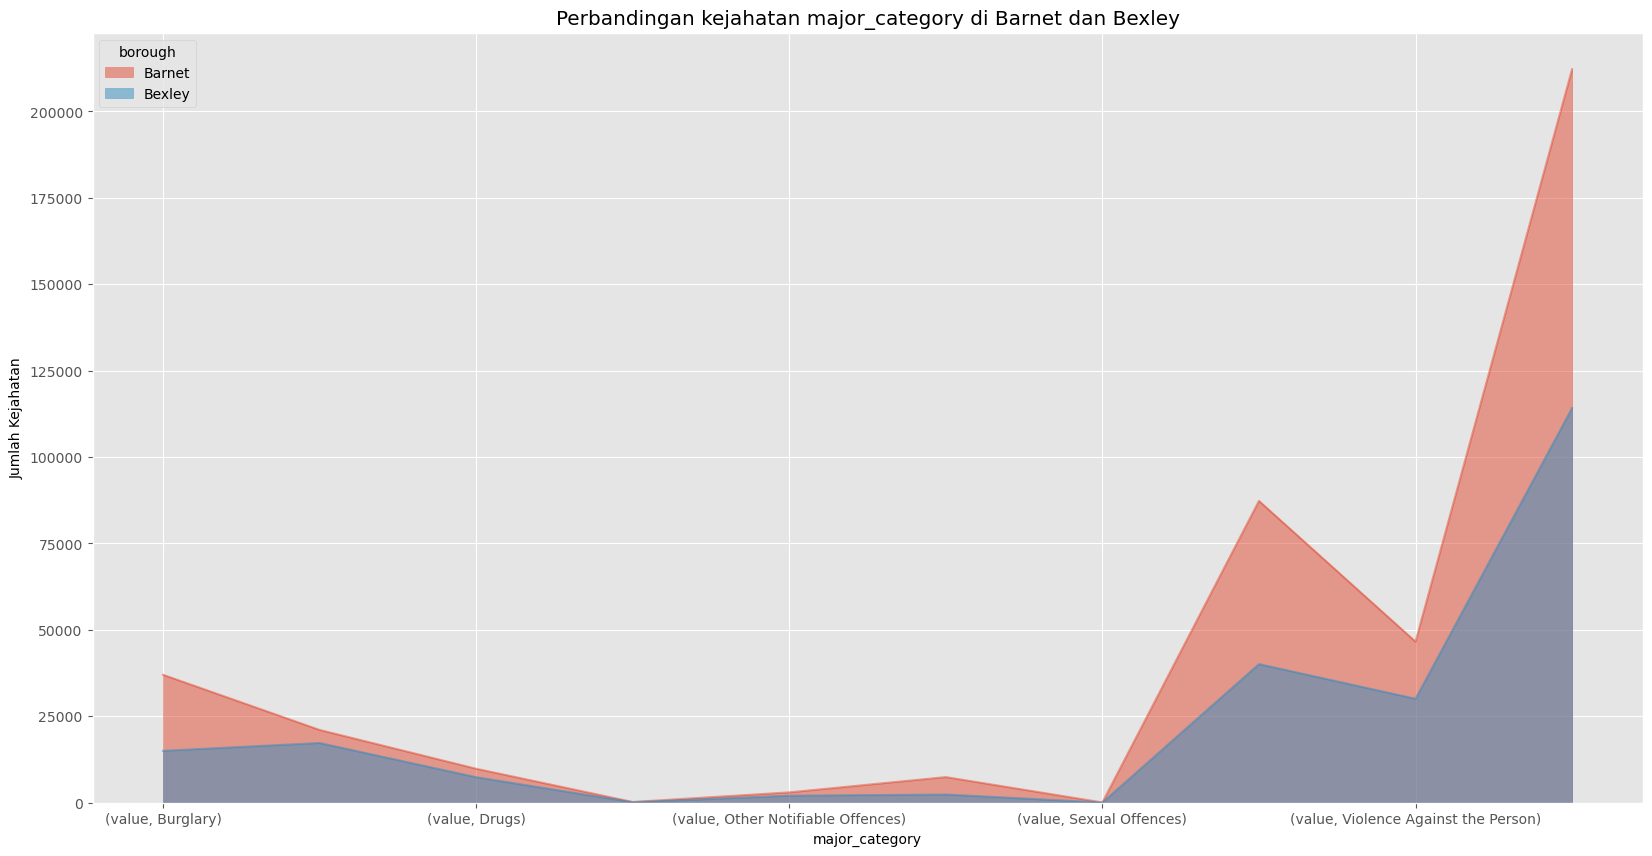

In [61]:
# Membuat area plot
BB_crime.plot(kind='area',
              stacked=False,
              figsize=(20, 10))

plt.title('Perbandingan kejahatan major_category di Barnet dan Bexley')
plt.ylabel('Jumlah Kejahatan')
plt.xlabel('major_category')
plt.show()

Dari areaplot yang ditampilkan diatas dapat kita lihat bahwa area plot untuk seluruh jenis kejahatan yang masuk kelompok major_category di kota Barnet lebih luas daripada areaplot untuk kota Bexley sehingga dapat disimpulkan bahwa tingkat kriminalitas dengan kelompok kriminalitas berupa major_category di Barnet lebih tinggi daripada di kota Bexley 

# Histogram

In [62]:
# Membuat bin histogram berdasarkan data BB_crime
count, bin_edge = np.histogram(BB_crime)


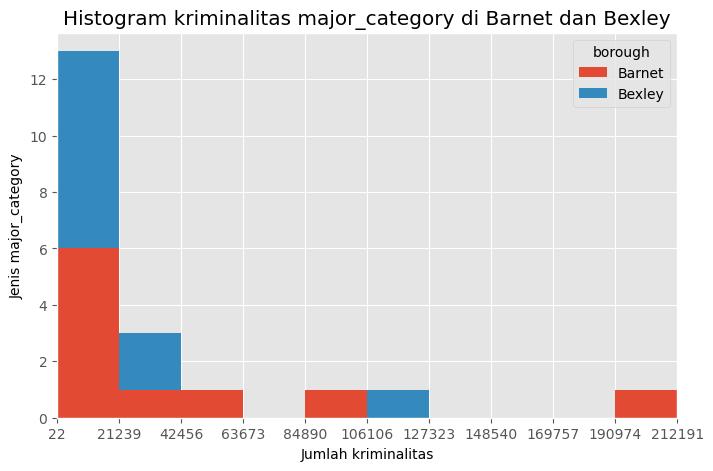

In [63]:
# Membuat histogram
count, bin_edges = np.histogram(BB_crime)

xmin =bin_edges[0] - 10
xmax = bin_edges[-1] + 10
BB_crime.plot(kind='hist', 
              figsize=(8, 5),
              bins=10, 
              xticks=bin_edges,
              stacked=True,
              xlim=(xmin, xmax))

plt.title('Histogram kriminalitas major_category di Barnet dan Bexley') # add a title to the histogram
plt.ylabel('Jenis major_category') # add y-label
plt.xlabel('Jumlah kriminalitas') # add x-label

plt.show()


Dari histogram diatas dapat diketahui bahwa jumlah kriminalitas di Barnet dan Bexley masing - masing terbagi kedalam 3 range dan 2 range 

Range jumlah kriminalitas di Barnet 
- 22 - 21239 , ada 6 jenis kriminalitas kelompok major_category
- 21239 - 63673, 1 jenis kriminalitas kelompok major_category
- 84890 - 106106, 1 jenis kriminalitas kelompok major_category
- Total jumlah kriminalitas  kelompok major_category di Barnet sekitar 190974 -212191

Range jumlah kriminalitas di Bexley
- 22 - 21239, 7 jenis kriminalitas kelompok major_category
- 21239 - 42456, 2 jenis kriminalitas major_category
- total jumlah kriminalitas  kelompok major_category di Bexley sekitar 106106 - 126323

### Bar Chart

In [64]:
#membuat variabel baru yang berisi data kriminalitas di Barnet
br_crime = major_crime.loc['Barnet'].transpose()
br_crime.drop('Total') #membuang total

       major_category             
value  Burglary                       36981
       Criminal Damage                21024
       Drugs                           9796
       Fraud or Forgery                 175
       Other Notifiable Offences       2953
       Robbery                         7374
       Sexual Offences                   38
       Theft and Handling             87285
       Violence Against the Person    46565
Name: Barnet, dtype: int64

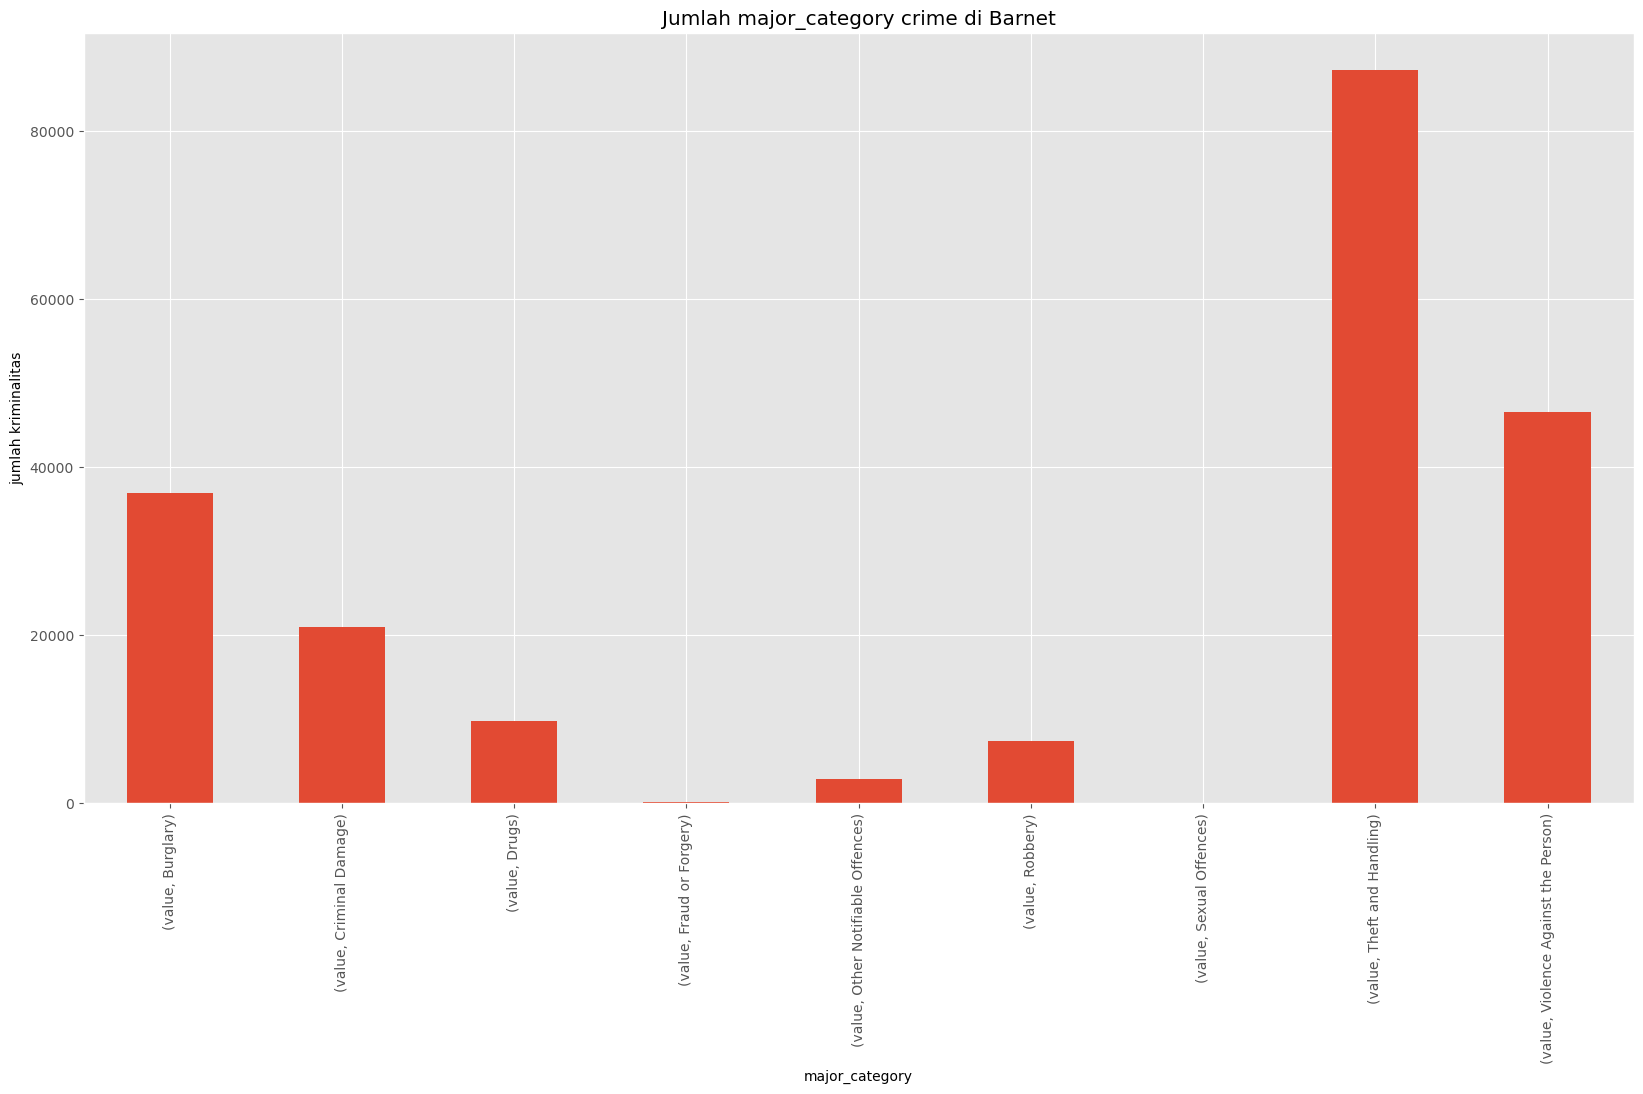

In [65]:
# Membuat bar chart
br_crime.drop('Total').plot(kind='bar', figsize =(20,10))

plt.xlabel('major_category') # judul sumbu x
plt.ylabel('jumlah kriminalitas') # judul sumbu y
plt.title('Jumlah major_category crime di Barnet') # judul plot 

plt.show()

Dari plot diatas dapat kita lihat bahwa jenis kriminalitas  sexual offences memiliki nilai 0 yang dapat diartikan kriminalitas jenis ini tidak pernah terjadi di Barnet. Kemudian untuk kriminalitas yang paling sering terjadi di Barnet adalah kriminalitas jenis theft and handling yangmana jumlahnya kejadiaannya melebihi 8500 kejadian. Dan kriminalitas yang hampir tidak pernah terjadi adalah kriminalitas jenis Fraud or forgery. 

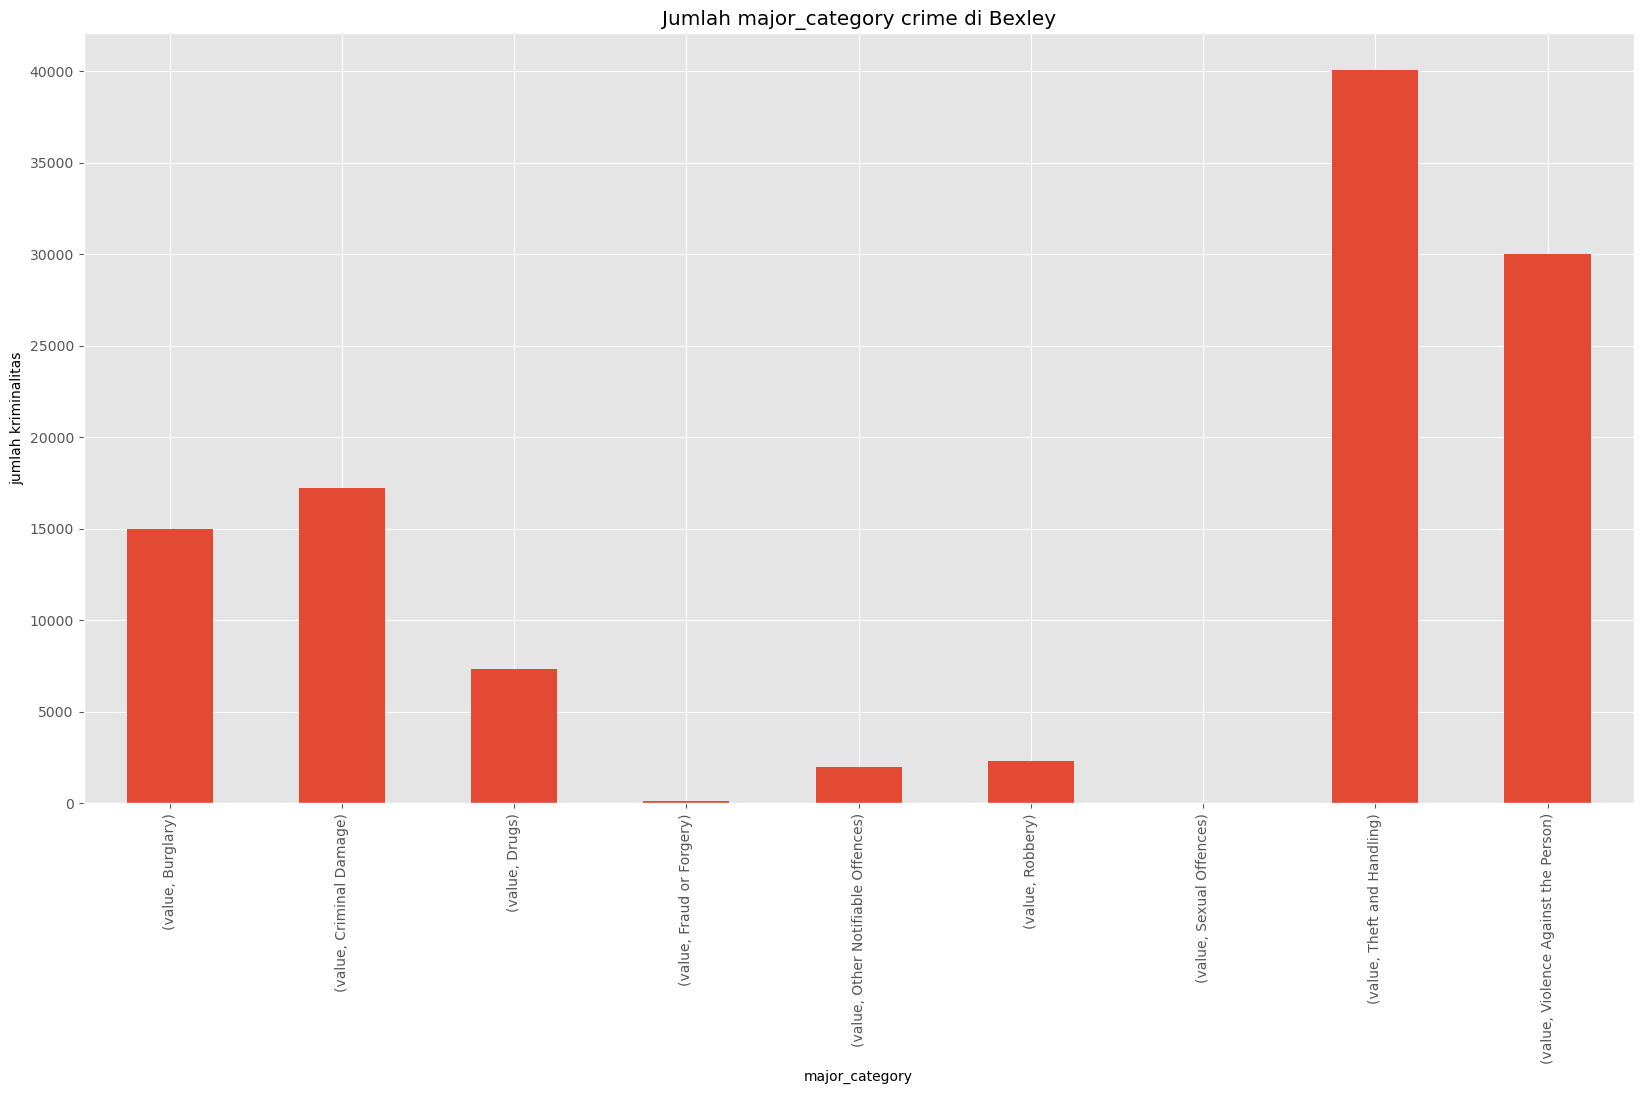

In [66]:
#membuat plot jenis bar dengan data kriminalitas kelompok major_category di Bexley
major_crime.loc['Bexley'].transpose().drop('Total').plot(kind='bar', figsize =(20,10))

plt.xlabel('major_category') # judul sumbu x
plt.ylabel('jumlah kriminalitas') # judul sumbu y
plt.title('Jumlah major_category crime di Bexley') # judul plot 

plt.show()

Dari plot diatas dapat kita lihat bahwa jenis kriminalitas  sexual offences memiliki nilai 0 yang dapat diartikan kriminalitas jenis ini tidak pernah terjadi di Barnet. Kemudian untuk kriminalitas yang paling sering terjadi di Barnet adalah kriminalitas jenis theft and handling yangmana jumlahnya kejadiaannya melebihi 8500 kejadian. Dan kriminalitas yang hampir tidak pernah terjadi adalah kriminalitas jenis Fraud or forgery. 

### Pie Chart

In [67]:
br_crime = major_crime.loc['Barnet'].transpose() #membuat variabel baru yang hanya berisi major_category di kota Barnet kemudian di transposekan

br_crime.drop('Total') # menghilangkan Total 

br_crime

       major_category             
value  Burglary                        36981
       Criminal Damage                 21024
       Drugs                            9796
       Fraud or Forgery                  175
       Other Notifiable Offences        2953
       Robbery                          7374
       Sexual Offences                    38
       Theft and Handling              87285
       Violence Against the Person     46565
Total                                 212191
Name: Barnet, dtype: int64

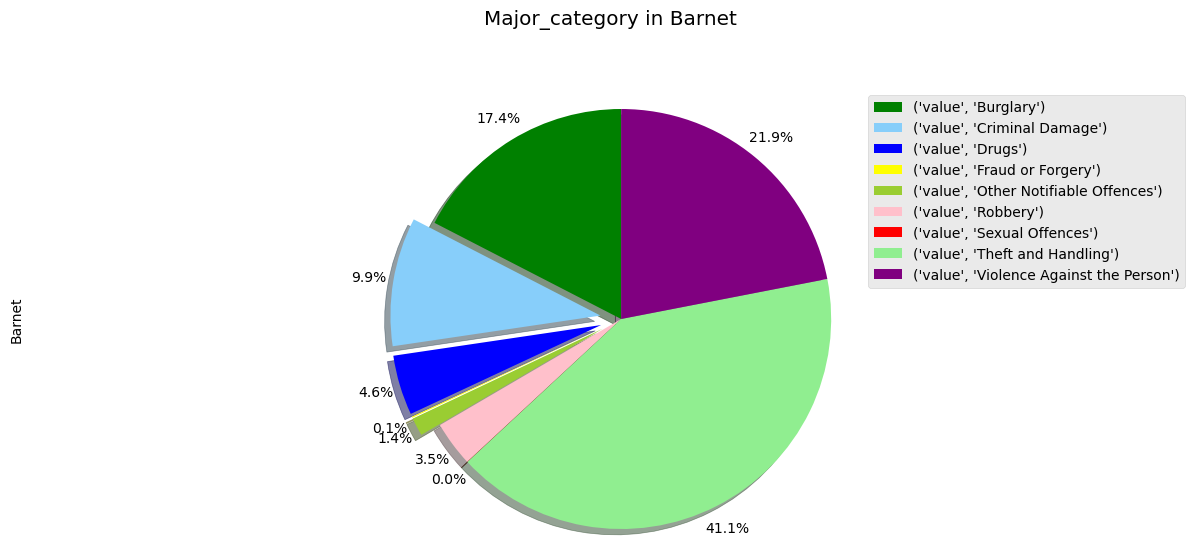

In [68]:
# membuat pie chart
explode_list = [0, 0.1, 0.1, 0.1, 0.1, 0, 0, 0,0] # ratio for each continent with which to offset each wedge.
colors_list = ['green', 'lightskyblue','Blue', 'yellow', 'yellowgreen', 'pink', 'red', 'lightgreen', 'purple']

br_crime.drop('Total').plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,
                            labels=None,      
                            pctdistance=1.12,    
                            colors=colors_list,  
                            explode=explode_list 
                            )


plt.title('Major_category in Barnet', y=1.12) 

plt.axis('equal') 

# menambahkan legend
plt.legend(labels=br_crime.index, loc='upper right') 



 

plt.show()

Dari pie chart yang ditampilkan diatas kita dapat melihat berapa persentase setiap kriminalitas yang terjaddi di Barnet 

- Presentase keriminalitas jenis 'Burglary' di Barnet sebesar 17.4%  
- Presentase kriminalitas jenis  'criminal damage' di Barnet sekitar 9.9%
- Presentase kriminalitas jenis 'Drugs' di Barnet sekitar 4,6%
- Presentase kriminalitas jenis 'Fraud and Frogery' di Barnet sebesar 0.1%
- Presentase kriminalitas jenis 'Robbery' di Barnet sebesar 3.5%
- Presentase kriminalitas jenis 'Sexual offences' di Barnet sebesar 0.0%
- Presentase kriminalitas jenis 'Theft and Handling' di Barnet sebesar 41.1%
- Presentase kriminalitas jenis 'violence against the person' di Barnet sebesar 21.9%
- Presentase kriminalitas jenis 'robbery' di Barnet sebesar 3.5%

Berdasarkan pie chart dapat disimpulkan bahwa presentase kriminalitas terbesar adalah kriminalitas 'Theft and Handling'

### Box Plot

Memplotkan data BB_crime kedalam box plot

In [69]:
BB_crime.drop('Total').describe()

borough,Barnet,Bexley
count,9.000000,9.000000
mean,23576.777778,12681.777778
std,29053.577885,14341.560966
min,38.000000,22.000000
25%,2953.000000,1999.000000
50%,9796.000000,7346.000000
75%,36981.000000,17244.000000
max,87285.000000,40071.000000


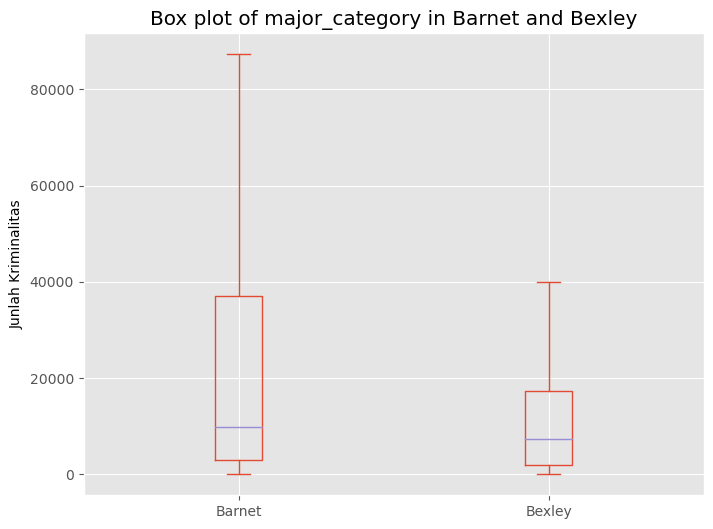

In [70]:
#Membuat visualisasi boxplot
BB_crime.drop('Total').plot(kind='box', figsize=(8,6))

plt.title('Box plot of major_category in Barnet and Bexley' )
plt.ylabel('Junlah Kriminalitas')

plt.show()

Barnet 
- minimum :38
- maximum : 87285
- kuartil pertama : 2953
- kuartil kedua : 9796
- kuartil ketiga : 36981

Bexley 
- minimum : 22
- maximum : 40071
- kuartil pertama : 1999
- kuartil kedua : 73456
- Kuartil ketiga : 17244




### Scatter Plot 

In [71]:
#Mengelompokan data major_category berdasarkan tahun 
mj_c = pd.pivot_table(df, values=('value'), index=['year'],
                             columns=['major_category'],
                             aggfunc=np.sum, fill_value=0)

mj_c

major_category,Burglary,Criminal Damage,Drugs,Fraud or Forgery,Other Notifiable Offences,Robbery,Sexual Offences,Theft and Handling,Violence Against the Person
year,,,,,,,,,
2008,88092,91872,68804,5325,10112,29627,1273,283692,159844
2009,90619,85565,60549,0,10644,29568,0,279492,160777
2010,86826,77897,58674,0,10768,32341,0,290924,157894
2011,93315,70914,57550,0,10264,36679,0,309292,146901
2012,93392,62158,51776,0,10675,35260,0,334054,150014
2013,87222,56206,50278,0,10811,29337,0,306372,146181
2014,76053,59279,44435,0,13037,22150,0,279880,185349
2015,70489,62976,39785,0,14229,21383,0,284022,218740
2016,68285,64071,38914,0,15809,22528,0,294133,232381


In [72]:
#Mentotalkan seluruh major_category yang ada
mj_c['Total'] = mj_c.iloc[:, 0:].sum(axis=1)


In [73]:
# Mereset Index
mj_c.reset_index(inplace =True)
mj_c

major_category,year,Burglary,Criminal Damage,Drugs,Fraud or Forgery,Other Notifiable Offences,Robbery,Sexual Offences,Theft and Handling,Violence Against the Person,Total
0,2008,88092,91872,68804,5325,10112,29627,1273,283692,159844,738641
1,2009,90619,85565,60549,0,10644,29568,0,279492,160777,717214
2,2010,86826,77897,58674,0,10768,32341,0,290924,157894,715324
3,2011,93315,70914,57550,0,10264,36679,0,309292,146901,724915
4,2012,93392,62158,51776,0,10675,35260,0,334054,150014,737329
5,2013,87222,56206,50278,0,10811,29337,0,306372,146181,686407
6,2014,76053,59279,44435,0,13037,22150,0,279880,185349,680183
7,2015,70489,62976,39785,0,14229,21383,0,284022,218740,711624
8,2016,68285,64071,38914,0,15809,22528,0,294133,232381,736121


In [74]:
# membuat data tren Burglary dari tahun 2008 - 2016
mc = mj_c[['year', 'Burglary']]
mc

major_category,year,Burglary
0,2008,88092
1,2009,90619
2,2010,86826
3,2011,93315
4,2012,93392
5,2013,87222
6,2014,76053
7,2015,70489
8,2016,68285


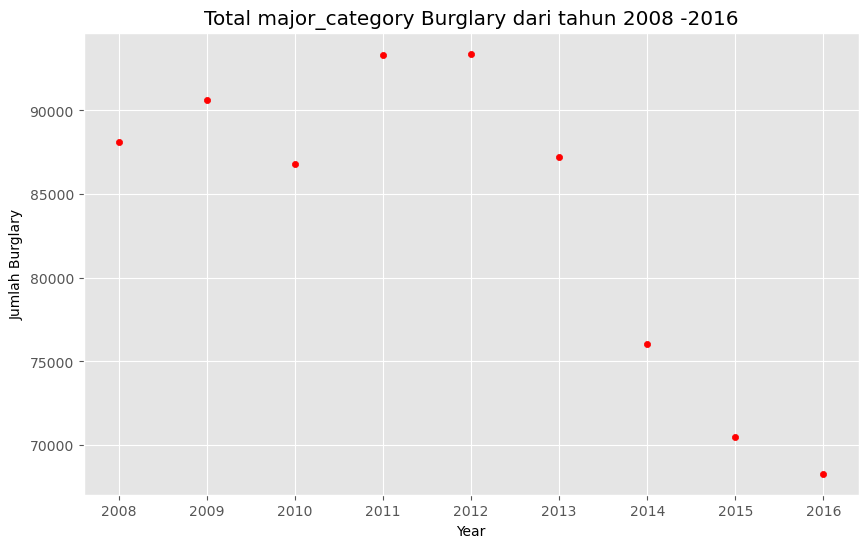

In [75]:
#Memplotkan mj dengan scatter plot dengan sumbu x year dan sumbu y Burglary
mc.plot(kind='scatter', x='year', y='Burglary', figsize=(10, 6), color='Red')
 
plt.title('Total major_category Burglary dari tahun 2008 -2016')
plt.xlabel('Year')
plt.ylabel('Jumlah Burglary')

plt.show()

Dari scatter plot diatas dapat diketahui bahwa tren major_category jenis Burglary di London, dari tahun 2008 - 2016 sangat bervariasi jumlahnya. kriminalitas Burglary di kota London mengalami puncak atau tertinggi saat tahun 2011 dan 2012. Dan setelah itu sejak tahun 2012 kriminalitas Burglary di London terus mengalami penurunan hingga tahun 2016.

### Word Clouds

Membuat variabel baru yang berisi kolom borough dan  minor_category

In [76]:
df_min = pd.DataFrame(df, columns = ['borough', 'major_category', 'year', 'value'])

In [77]:
df_min.head()

,borough,major_category,year,value
9,Sutton,Theft and Handling,2016,1
16,Barking and Dagenham,Theft and Handling,2009,1
24,Ealing,Theft and Handling,2012,2
25,Hackney,Violence Against the Person,2013,1
32,Bromley,Criminal Damage,2016,1


In [78]:
# mengelompokan borough  dan value berdasarkan sum
df_min_sum = df_min[['borough', 'value']].groupby(['borough'], as_index= True).sum()
df_min_sum.head()

,value
borough,
Barking and Dagenham,149447
Barnet,212191
Bexley,114136
Brent,227551
Bromley,184349


In [79]:
# membuat variabel baru yang berisi jumlah seluruh value 
totalvalue = df_min['value'].sum()
totalvalue

6447758

In [80]:
# inisiasi wordcloud
max_words = 100
word_string = ' '
for borough in df_min_sum.index.values:
    # memeriksa apakah nama negara adalah nama satu kata
    if len(borough.split(' ')) == 1:
        repeat_num_times = int(df_min_sum.loc[borough,'value']/float(totalvalue)*max_words)
        word_string = word_string + ((borough + ' ') * repeat_num_times)
                                     
# menampilkan teks yang dihasilkan
word_string

' Barnet Barnet Barnet Bexley Brent Brent Brent Bromley Bromley Camden Camden Camden Camden Croydon Croydon Croydon Croydon Ealing Ealing Ealing Enfield Enfield Enfield Greenwich Greenwich Hackney Hackney Hackney Haringey Haringey Haringey Harrow Havering Havering Hillingdon Hillingdon Hillingdon Hounslow Hounslow Islington Islington Islington Lambeth Lambeth Lambeth Lambeth Lewisham Lewisham Lewisham Merton Newham Newham Newham Newham Redbridge Redbridge Southwark Southwark Southwark Southwark Sutton Wandsworth Wandsworth Wandsworth Westminster Westminster Westminster Westminster Westminster Westminster Westminster '

In [81]:
#Membuat wordlcloud
wordcloud = WordCloud(background_color='white').generate(word_string)
print('word berhasil terbuat')

word berhasil terbuat


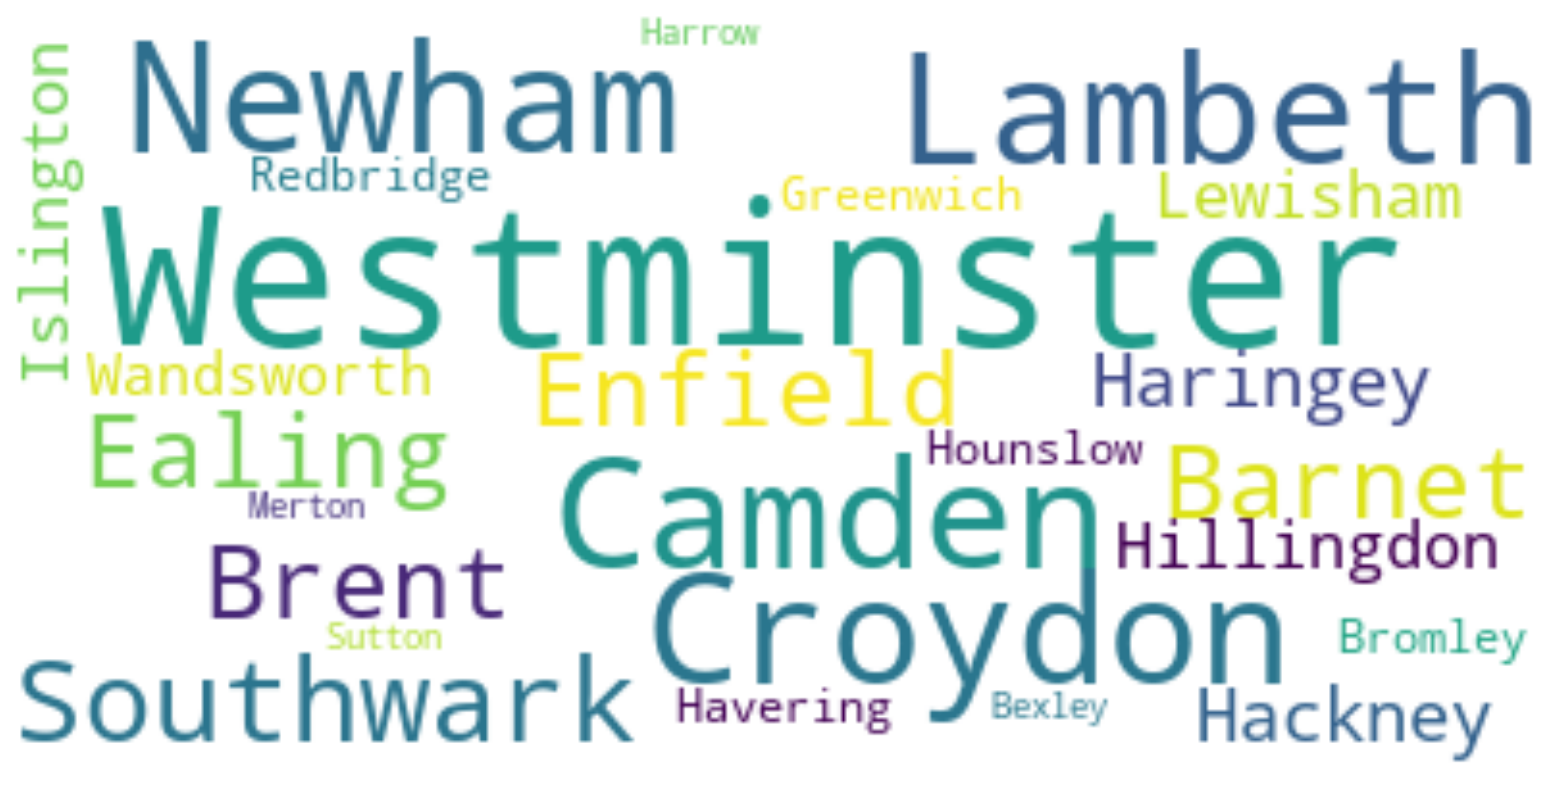

In [82]:
#Menampilkan hasil wordcloud
fig = plt.figure()
fig.set_figwidth(20)
fig.set_figheight(10)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### London Map

In [83]:

london_map = folium.Map(location=[51.509865, -0.118092], zoom_start=15)

# display world map
london_map